So far, we have seen how to define the hypothesis function and measure how well it fits the given data through the cost function.

From now on, we will study how to find the **optimal parameter** of the hypothesis function.

**Gradient descent** is one of the methods that can be used to **minimize the cost function**, and is a general method used for various optimizations other than the cost function. Gradient descent basically takes the following strategy.

In other words **gradient descent algorithm** is an **optimization algorithm**. We start with a random point on the function and move in the negative direction of the gradient of the function to reach the local/global minimum.

<img src="../img/gradient_descent/gradient_descent_outline.png" width="650"/>

## Before we move forward, let's review basic calculus concepts with derivatives


#### Rate of Change (ROC) visualization
The rate of change (ROC) is the speed at which a variable changes over a specific period of time.

A rate of change is a rate that describes how one quantity changes in relation to another quantity. If x is the independent variable and y is the dependent variable.


**Rate of change** can be **positive**, **negative** or **zero**
<img src="../img/gradient_descent/ROC_types.png" width="500"/>


Example:

<img src="../img/gradient_descent/table_to_find_the_rate_of_change.png" width="450"/>

The rate of change is $\frac{40}{1} $ or 40 . This means a vehicle is traveling at a rate of 40 miles per hour.
In other words - Rate of change = $\frac{Change \ in \ Y}{Change \ in \ X}$

<img src="../img/gradient_descent/rateofchange_details.png" width="450"/>



In [5]:
import pandas as pd
from numpy import diff


def get_previous_element_if_exists(arr):
    if len(arr) > 1:
        return arr[-2]
    else:
        return 0


def rate_of_change(x: list, y: list):
    """
    :param y: dependent var
    :param x: independent var
    :return: rate of change
    """
    change_in_x = x[-1] - get_previous_element_if_exists(x)
    change_in_y = y[-1] - get_previous_element_if_exists(y)

    return change_in_y / change_in_x


df = pd.DataFrame(
    {'distance': [80, 160, 240],
     'time': [2, 4, 6]
     })

r1 = rate_of_change(df['time'][0:2].values, df['distance'][0:2].values)
print("Rate of change custom = ", r1)

dydx = diff(df['distance'].values) / diff(df['time'].values)
print("Rate of change numpy = ", dydx)

Rate of change custom =  40.0
Rate of change numpy =  [40. 40.]


#### Average rate of change

The ***average rate of change*** finds how fast a function is changing with respect to something else changing.
It is simply the process of calculating the rate at which the ***output (y-values)*** changes compared to its ***input (x-values).***
<br>
<img src="../img/gradient_descent/rate_of_change_formula.png" width="400"/>

To find the average rate of change, we divide the change in y (output) by the change in x (input). And visually, all we are doing is calculating the slope of the secant line passing between two points.
<br>
<img src="../img/gradient_descent/calc_slope_example.png" width="400"/>

Example:
<br>
<img src="../img/gradient_descent/example_rate_of_change.png" width="500"/>

All you have to do is calculate the slope to find the average rate of change!
<br>
<img src="../img/gradient_descent/find_slope.png" width="500"/>

#### Average Rate Of Change Vs Instantaneous Rate Of Change

While both are used to find the slope, the average rate of change calculates the slope of the ***secant line*** using the slope formula from algebra. The instantaneous rate of change calculates the slope of the ***tangent line*** using ***derivatives***.

<br>
<img src="../img/gradient_descent/tangent_and_secand.png" width="500"/>

Using the graph above, we can see that the green ***secant line*** represents the average rate of change between points P and Q, and the orange **tangent line** designates the instantaneous rate of change at point P.



### Derivatives:

Instantaneous rate of change is the main goal of derivative.
Instead of thinking of differences ("How far to the next point?") we can compare rates ("How fast are you moving through this continuum?"). Derivative, in mathematics, the rate of change of a function with respect to a variable. Geometrically, the derivative of a function can be interpreted as the slope of the graph of the function or, more precisely, as the slope of the ***TANGENT*** line at a point.

the formula for the slope is (y1 − y0)/(x1 − x0). Another way to express this formula is [f(x0 + h) − f(x0)]/h, if h is used for x1 − x0 and f(x) for y.

Curves do not have a constant slope. To find the slope at a desired point, the choice of the second point needed to calculate the ratio represents a difficulty because, in general, the ratio will represent only an average slope between the points

We can find an average slope between two points:

<img src="../img/gradient_descent/derevative_details.png" width="500"/>

1. Start with some system to study: **f(x)**
2. Change by the smallest amount possible: **(dx)**
3. Get the before-and-after difference: **f(x + dx) + f(x)**
4. We don't know exactly how small **dx** is, and we don't care: get the rate of motion

ML uses derivatives in optimization problems. Optimization algorithms like **gradient descent** use derivates to decide whether to increase or decrease the weights to **increase or decrease** any objective function.

### Gradient descent:

***Gradient Descent*** is an optimisation algorithm which helps you find the optimal weights for your model.
***Gradient Descent*** is an iterative algorithm that is used to minimize a ***cost function*** by finding the optimal parameters.

1. Minimises the cost function
2. Helps find the optimal weights of a learning model for which the cost function is highly minimized.
3. Cost function can be defined as the difference between the actual output and the predicted output.
4. The smaller the cost function is, the closer the predicted output from your model is to the actual output.

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum.
<br>
<img src="../img/gradient_descent/gradient_descent.png" width="400"/>

### Learning rate:
The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting 'miss' the lowest point since the slope of the hill is constantly changing.
With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate will take us a very long time to get to the bottom.

Although gradient descent sometimes gets stuck in a ***local minimum*** or a ***saddle point*** instead of finding the ***global minimum***
"In mathematics, a saddle point or minimax point[1] is a point on the surface of the graph of a function where the slopes (derivatives) in orthogonal directions are all zero (a critical point), but which is not a local extremum of the function."

 machine learning methods often apply it internally to optimize model parameters. For example, neural networks find weights and biases with gradient descent.

### Cost Function or Loss function is the goal of optimization:
The cost function, or loss function, is the function to be minimized (or maximized) by varying the decision variables.
They tend to minimize the difference between actual and predicted outputs by adjusting the model parameters

In a regression problem, you typically have the vectors of input variables X = (x1, …, xr) and the actual outputs 'y'. You want to find a model that maps 'x' to a predicted response F(x) so that F(x) is as close as possible to 'y'.

Your goal is to minimize the difference between the prediction F(x) and the actual data y. This difference is called the residual.

In this type of problem, you want to minimize SSR or MSE:
Both SSR and MSE use the square of the difference between the ***actual*** and ***predicted*** outputs.


***Sum of squared residuals (SSR):***


***Mean squared error (MSE = SSR / n):***

### Step-by-step example:
There are two parameters in our cost function we can control: 'm' (weight) and 'b' (bias). Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a ***gradient***.
<br>

The gradient can be calculated as:
<img src="../img/gradient_descent/gradient_can_be_calculated_as.png" width="500"/>

To solve for the gradient, we iterate through our data points using our new 'm' and 'b' values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

TODO:
https://ruder.io/optimizing-gradient-descent/
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#sigmoid-activation


In [3]:
#Implementation of Basic Gradient Descent
def gradient_descent(gradient, start, learn_rate, n_iter):
    '''
    :param gradient: is the function or any Python callable object that takes a vector and returns the gradient of the function you’re trying to minimize.
    :param start: is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and so on) or scalar (in the case of a one-dimensional problem).
    :param learn_rate: is the learning rate that controls the magnitude of the vector update.
    :param n_iter:  is the number of iterations.
    :return:
    '''

    '''
    implementation of the algorithm that starts with an arbitrary point, start, iteratively moves it toward the minimum, and returns a point that is hopefully at or near the minimum

    Gradient descent, a first-order iterative optimization algorithm for finding the minimum of a function
    '''

    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
    return vector


'''
Test your gradient descent implementation
lambda v: 2 * v to provide the gradient of 𝑣². You start from the value 10.0 and set the learning rate to 0.2. You get a result that’s very close to zero, which is the correct minimum.
'''
function_1 = lambda v: 2 * v
gradient_descent(gradient=function_1, start=10.0, learn_rate=0.005, n_iter=50)

6.050060671375367

Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

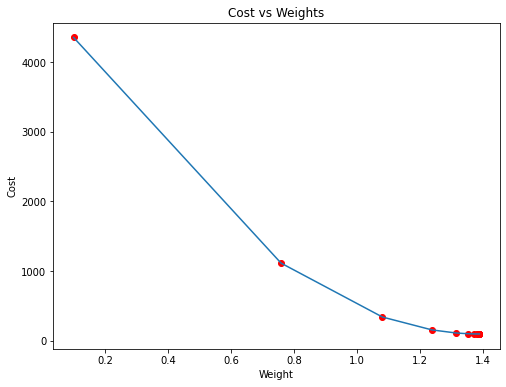

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


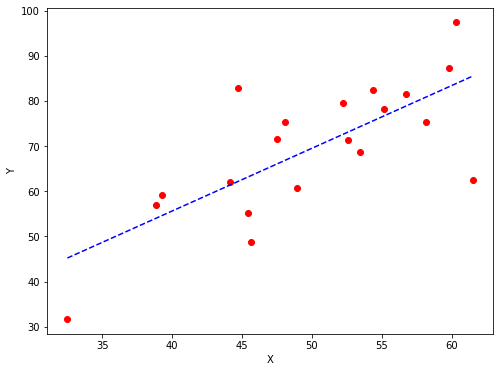

In [4]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost


# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations=1000, learning_rate=0.0001,
                     stopping_threshold=1e-6):
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2 / n) * sum(x * (y - y_predicted))
        bias_derivative = -(2 / n) * sum(y - y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i + 1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")

    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias
    # Data
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495, 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

# Estimating weight and bias using gradient descent
estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight * X + eatimated_bias

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red', markersize=10,
         linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### Stochastic Gradient Descent Algorithms
https://realpython.com/gradient-descent-algorithm-python/

### Gradient Descent in Keras and TensorFlow
Stochastic gradient descent is widely used to train neural networks. The libraries for neural networks often have different variants of optimization algorithms based on stochastic gradient descent, such as:

* Adam
* Adagrad
* Adadelta
* RMSProp


#### Partial derivatives

https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction

Gradient descent - math explanation
https://youtu.be/jc2IthslyzM?t=129

https://realpython.com/gradient-descent-algorithm-python/